# Social Engineering - TD3

## Exercice 2A

### Imports

In [5]:
import pandas as pd
pd.options.mode.copy_on_write = True

In [6]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('/app/d3lta')
import d3lta.faissd3lta as faiss

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
from matplotlib import dates as plt_dates

In [28]:
from datetime import datetime, date, timedelta

### Loading and preparing the dataset

In [10]:
df_posts = pd.read_csv('../../dataset_unifie.csv', parse_dates=['date'])
# df_posts.reset_index()
df_posts.index = df_posts.index.astype(str) # This should allow the index to be preserved

### Creating embeddings

In [11]:
examples_dataset = df_posts['content'].to_list()
examples_dataset

["Nos études sur l'impact des éoliennes offshore montrent des effets mineurs sur les oiseaux marins. Webinaire demain 14h sur les résultats.",
 "RASSEMBLEMENT URGENT ! Les autorités veulent nous imposer 150 monstres d'acier qui vont détruire notre patrimoine maritime. Rejoignez-nous samedi 10h place de la Mairie. Ensemble, nous sommes plus forts ! ✊🌊 #StopEoliennes #Loire",
 "🚨 SCANDALE 🚨\n\nNous avons obtenu des documents confidentiels qui prouvent que :\n- Le coût réel du projet est 3 fois supérieur aux annonces officielles\n- Des espèces protégées seront impactées (dauphins, oiseaux migrateurs)\n- Les études d'impact ont été bâclées en 3 mois au lieu de 2 ans\n\nLes médias mainstream refusent de relayer cette information. PARTAGEZ MASSIVEMENT avant la censure !\n\n#ReveilCitoyen #TransparenceMaintenant #StopEoliennes",
 'URGENT ! Les éoliennes vont détruire notre littoral ! Mobilisation générale samedi 14h place de la République ! Venez nombreux !',
 "Point factuel sur le projet de 

In [12]:

df = pd.DataFrame(examples_dataset, columns=["text_language_detect"])
df.index = df.index.astype(str)

matches, df_clusters = faiss.semantic_faiss(
    df=df_posts.rename(columns={"content": "original"}),
    min_size_txt=10,
    embeddings_to_save='myembeddings',
    # threshold_grapheme=0.001, Doesn’t seem to have any effect
    # threshold_language=0.3, Doesn’t seem to have much effect. When too low everything is put in the same cluster.
    threshold_semantic=0.55,
)

>>> Start prepare_dataset
Done.

Removing 0 short texts over 140 sentences...
Done.
<<< End prepare_dataset, Took: 0.1132 sec
language detection
>>> Start compute_language
Loading fastext model from local file...
Done.



2it [00:00, 6043.67it/s]             

<<< End compute_language, Took: 0.1077 sec
>>> Start compute_embeddings


2025-12-31 02:16:16.475693: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


INFO:tensorflow:Assets written to: use_model_kaggle/assets


INFO:tensorflow:Assets written to: use_model_kaggle/assets
  0%|          | 0/1 [00:00<?, ?it/s]2025-12-31 02:16:39.890010: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2328348800 exceeds 10% of free system memory.
2025-12-31 02:16:45.271490: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2328348800 exceeds 10% of free system memory.
2025-12-31 02:16:49.033567: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2328348800 exceeds 10% of free system memory.
2025-12-31 02:16:52.787605: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2328348800 exceeds 10% of free system memory.
2025-12-31 02:16:56.445821: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2328348800 exceeds 10% of free system memory.
2it [00:27, 13.81s/it]                       


<<< End compute_embeddings, Took:1.6 min
>>> Start create_index_cosine
<<< End create_index_cosine, Took: 0.0005 sec
>>> Start find_matches


100%|██████████| 2/2 [00:00<00:00, 260.88it/s]

<<< End find_matches, Took: 0.0162 sec
>>> Start compute_duplicate_types
<<< End compute_duplicate_types, Took: 0.0122 sec


In [13]:
# How many clusters do we have?
matches

,source,target,score,duplicates,language_source,text_to_embed_source,text_grapheme_source,language_target,text_to_embed_target,text_grapheme_target,dup_type,score_lev
0,0,36,0.670270,0-36,fr,Nos études sur l'impact des éoliennes offshore...,nosetudessurlimpactdeseoliennesoffshoremontren...,fr,Les éoliennes perturbent gravement les routes ...,leseoliennesperturbentgravementlesroutesmigrat...,rewording,0.313043
1,3,25,0.567688,25-3,fr,URGENT ! Les éoliennes vont détruire notre lit...,urgentleseoliennesvontdetruirenotrelittoralmob...,fr,STOP au projet éolien destructeur ! Grande man...,stopauprojeteoliendestructeurgrandemanifestati...,rewording,0.250000
2,3,31,0.556496,3-31,fr,URGENT ! Les éoliennes vont détruire notre lit...,urgentleseoliennesvontdetruirenotrelittoralmob...,fr,Les VRAIS écologistes s'opposent fermement aux...,lesvraisecologistessopposentfermementauxeolien...,rewording,0.182692
3,3,52,0.563835,3-52,fr,URGENT ! Les éoliennes vont détruire notre lit...,urgentleseoliennesvontdetruirenotrelittoralmob...,fr,Les autorités CACHENT systématiquement la véri...,lesautoritescachentsystematiquementlaveritesur...,rewording,0.229508
4,4,19,0.780155,19-4,fr,Point factuel sur le projet de parc éolien off...,pointfactuelsurleprojetdeparceolienoffshore3an...,fr,Communiqué officiel - Projet de parc éolien of...,communiqueofficielprojetdeparceolienoffshorela...,rewording,0.274933
...,...,...,...,...,...,...,...,...,...,...,...,...
122,85,123,0.596306,123-85,fr,Document ultra SECRET enfin déclassifié : le p...,documentultrasecretenfindeclassifieleprojeteol...,fr,COMPLOT MONDIAL RÉVÉLÉ : Le projet éolien offs...,complotmondialreveleleprojeteolienoffshorefait...,rewording,0.301282
123,88,133,0.584501,133-88,fr,Évidemment que le système nie ! C'est toujours...,evidemmentquelesystemeniecesttoujourspareilonr...,fr,ÉVEIL MASSIF EN COURS PARTOUT ! Les gens décou...,eveilmassifencourspartoutlesgensdecouvrentenfi...,rewording,0.297297
125,99,114,0.581430,114-99,fr,NOUVELLE RÉVÉLATION : Un ancien cadre d'EDF té...,nouvellerevelationunanciencadrededftemoigneano...,fr,🔴 LIVE terminé 🔴\n\nPlus de 15 000 personnes c...,livetermineplusde15000personnesconnecteesmerci...,rewording,0.206731
136,123,131,0.632165,123-131,fr,COMPLOT MONDIAL RÉVÉLÉ : Le projet éolien offs...,complotmondialreveleleprojeteolienoffshorefait...,fr,MENSONGE D'ÉTAT COLOSSAL : Le projet éolien of...,mensongedetatcolossalleprojeteolienoffshorecou...,rewording,0.333333


In [14]:
df_clusters

,Unnamed: 0,platform,author,date,original,engagement,interactions,text_grapheme,text_to_embed,text_language_detect,language,cluster
0,0,x,Dr_Laurent_CNRS,2024-01-15 09:23:12,Nos études sur l'impact des éoliennes offshore...,NaN,232.0,nosetudessurlimpactdeseoliennesoffshoremontren...,Nos études sur l'impact des éoliennes offshore...,Nos études sur l'impact des éoliennes offshore...,fr,0.0
1,0,facebook,Collectif Anti-Éoliennes Loire,2024-01-15 09:30:12,RASSEMBLEMENT URGENT ! Les autorités veulent n...,3450.0,NaN,rassemblementurgentlesautoritesveulentnousimpo...,RASSEMBLEMENT URGENT ! Les autorités veulent n...,RASSEMBLEMENT URGENT ! Les autorités veulent n...,fr,NaN
2,1,facebook,Vérité Énergie France,2024-01-15 14:22:45,🚨 SCANDALE 🚨\n\nNous avons obtenu des document...,8911.0,NaN,scandalenousavonsobtenudesdocumentsconfidentie...,🚨 SCANDALE 🚨\n\nNous avons obtenu des document...,SCANDALE. Nous avons obtenu des documents conf...,fr,NaN
3,1,x,EcoDefense44,2024-01-15 14:32:45,URGENT ! Les éoliennes vont détruire notre lit...,NaN,46.0,urgentleseoliennesvontdetruirenotrelittoralmob...,URGENT ! Les éoliennes vont détruire notre lit...,URGENT ! Les éoliennes vont détruire notre lit...,fr,0.0
4,2,facebook,Transition Énergétique Pays de la Loire,2024-01-15 16:15:33,Point factuel sur le projet de parc éolien off...,446.0,NaN,pointfactuelsurleprojetdeparceolienoffshore3an...,Point factuel sur le projet de parc éolien off...,Point factuel sur le projet de parc éolien off...,fr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
135,90,x,FinalResistance,2024-01-21 09:35:46,C'est l'ULTIME COMBAT décisif pour notre liber...,NaN,778.0,cestlultimecombatdecisifpournotrelibertefondam...,C'est l'ULTIME COMBAT décisif pour notre liber...,C'est l'ULTIME COMBAT décisif pour notre liber...,fr,0.0
136,91,x,ElodieC_Biologiste,2024-01-21 10:27:31,Biologiste marine docteure. J'ai personnelleme...,NaN,208.0,biologistemarinedocteurejaipersonnellementpart...,Biologiste marine docteure. J'ai personnelleme...,Biologiste marine docteure. J'ai personnelleme...,fr,NaN
137,92,x,VraieCommunaute,2024-01-21 11:19:08,Rejoignez dès maintenant notre grande communau...,NaN,668.0,rejoignezdesmaintenantnotregrandecommunautedev...,Rejoignez dès maintenant notre grande communau...,Rejoignez dès maintenant notre grande communau...,fr,NaN
138,93,x,ThierryB_Retraite,2024-01-21 12:04:52,Retraité EDF après 40 longues années de carriè...,NaN,132.0,retraiteedfapres40longuesanneesdecarrieredansl...,Retraité EDF après 40 longues années de carriè...,Retraité EDF après 40 longues années de carriè...,fr,0.0


In [15]:
df_clusters['cluster'].unique()

array([ 0., nan,  3.,  2.,  1.,  4.])

### Questions d’analyse

#### *1. Quel est le plus grand cluster de duplication détecté ?*

In [16]:
df_clusters[['cluster', 'original']].groupby(by='cluster').count().rename(columns={'original': 'count'})

,count
cluster,
0.0,47
1.0,3
2.0,2
3.0,2
4.0,2


Le plus grand cluster est le cluster Numéro 0. Voici des exemples de textes qu’il contient :

In [17]:
df_clusters[df_clusters['cluster'] == 0][['original']].head()

,original
0,Nos études sur l'impact des éoliennes offshore...
3,URGENT ! Les éoliennes vont détruire notre lit...
4,Point factuel sur le projet de parc éolien off...
5,Interview du préfet maritime sur le projet éol...
11,Après 15 ans de recherche en écologie marine j...


#### *2. Identifiez les 5 comptes les plus actifs dans la duplication de contenu*

Nous allons identifier les 5 comptes les plus actifs **ET** qui appartiennent à un cluster, laissant présupposer qu’ils soient à l’origine de la duplication de contenu.

In [18]:
df_clusters[df_clusters['cluster'].notna()].groupby(by='author').count().sort_values(by='Unnamed: 0', ascending=False).head(5)

,Unnamed: 0,platform,date,original,engagement,interactions,text_grapheme,text_to_embed,text_language_detect,language,cluster
author,,,,,,,,,,,
Vérité Énergie France,6,6,6,6,6,0,6,6,6,6,6
Collectif Anti-Éoliennes Loire,2,2,2,2,2,0,2,2,2,2,2
France Patriote Résistance,2,2,2,2,2,0,2,2,2,2,2
ActionCitoyenne,1,1,1,1,0,1,1,1,1,1,1
ReveilNational,1,1,1,1,0,1,1,1,1,1,1


Les comptes les plus actifs sont d’aboard « Vérité Énergie France », puis *ex-aequo* « France Patriote Résistance » et « Collectif Anti-Éoliennes Loire ». Tous les autres auteurs apparaissent uniquement une seule fois dans le cluster.

### *3. Y a-t-il des patterns temporels dans les duplications ?*

Nous allons répondre à cette question avec une visualisation !

Dans cette visualisation, nous montrons le cluster de chaque post en fonction de sa date de publication. Nous ajoutons un peu d’aléatoire à chaque identifiant de cluster, ainsi qu’une transparence à chaque fois, afin de pouvoir distinguer les points plus facilement quand ils partagent le même cluster et la même date.

/tmp/ipykernel_899/3859493610.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_r.legend()


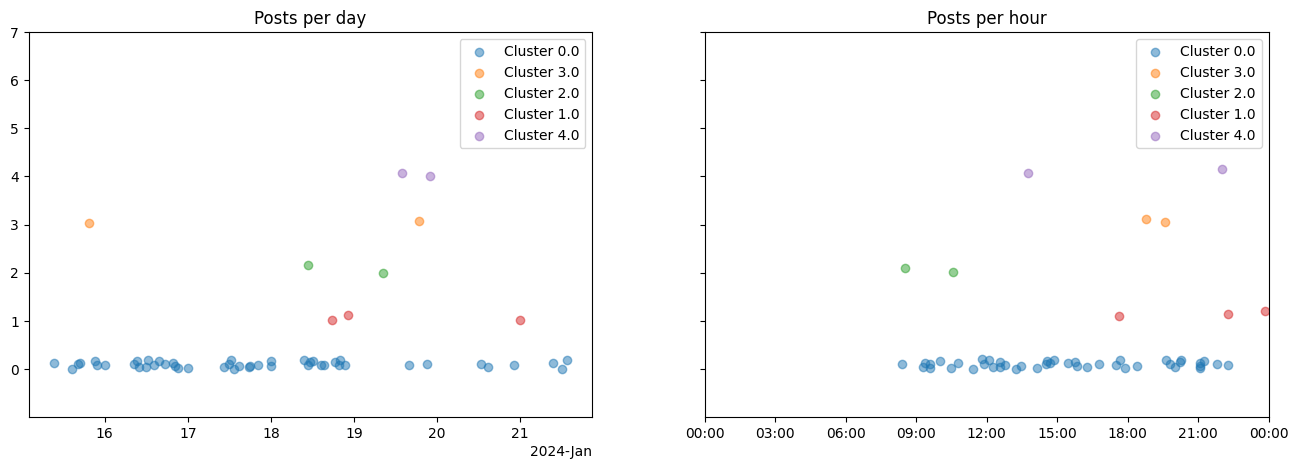

In [46]:
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

ax_l.set_title('Posts per day')
ax_l.set(ylim=(-1, 5), yticks=np.arange(0, 8))
ax_l.xaxis.set_major_formatter(plt_dates.ConciseDateFormatter(ax_l.xaxis.get_major_locator()))

arbitrary_day = date(2024, 1, 15) # Completely arbitrary, but matplotib cannot plot times...
ax_r.set_title('Posts per hour')
ax_r.xaxis.set_major_formatter(plt_dates.DateFormatter('%H:%M'))
ax_r.set_xlim(left=arbitrary_day, right=arbitrary_day + timedelta(days=1))
ax_r.legend()

for cluster_id in df_clusters['cluster'].dropna().unique():
   df_cluster = df_clusters[(df_clusters['cluster'] == cluster_id)]
   ax_l.scatter(df_cluster['date'], df_cluster['cluster'] + np.random.rand(len(df_cluster)) / 5, alpha=0.5, label=f"Cluster {cluster_id}")
   df_cluster['time'] = [datetime.combine(arbitrary_day, t) for t in df_cluster['date'].dt.time]
   # On enlève les articles de la visu par heure car ils ne comprennent pas d’heure dans leur date.
   df_cluster = df_cluster[(df_cluster['platform'] == 'facebook') | (df_cluster['platform'] == 'x')]
   ax_r.scatter(df_cluster['time'], df_cluster['cluster'] + np.random.rand(len(df_cluster)) / 5, alpha=0.5, label=f"Cluster {cluster_id}")

ax_l.legend()
ax_r.legend()

La grande majorité des posts du cluster 0 a été postée le 16, le 17 et le 18 janvier. Il y a ensuite une diminution brutale qui paraît peu naturelle.

Par heure, on se rend compte que les posts soint exclusivement postés entre 8h et minuit, ce qui paraît normal, bien que l’absence totale de posts entre minuit et 8h du matin paraît suspicieuse et artificielle.

### *4. Le contenu dupliqué porte-t-il sur des narratifs spécifiques ?*

Nous allons répondre à cette question en analysant des exemples de textes de chaque cluster.

In [20]:
cluster_ids = df_clusters[df_clusters['cluster'].notna()]['cluster'].unique()
cluster_ids.sort()
for cluster_id in cluster_ids:
    print(f"CLUSTER {cluster_id}")
    for text in df_clusters[df_clusters['cluster'] == cluster_id]['original'].head().to_list():
        text = text.replace('\n', '')
        print(f"\t{text}")
    print()

CLUSTER 0.0
	Nos études sur l'impact des éoliennes offshore montrent des effets mineurs sur les oiseaux marins. Webinaire demain 14h sur les résultats.
	URGENT ! Les éoliennes vont détruire notre littoral ! Mobilisation générale samedi 14h place de la République ! Venez nombreux !
	Point factuel sur le projet de parc éolien offshore :✅ 3 ans de concertation publique avec 45 réunions✅ Études d'impact menées par 12 organismes indépendants✅ Zone choisie pour minimiser l'impact sur la pêche (couloirs de migration préservés)✅ Création de 800 emplois locaux pendant la construction✅ Réduction de 450 000 tonnes de CO2/anToutes les études sont accessibles sur le site de la préfecture. Débat constructif bienvenu ! 🌱⚡
	Interview du préfet maritime sur le projet éolien offshore cet après-midi. Article complet dans Ouest-France demain matin.
	Après 15 ans de recherche en écologie marine je peux affirmer que l'éolien offshore est une solution viable pour la transition énergétique.

CLUSTER 1.0
	ILS 

Le cluster 0 se concentre sur l’impact d’un projet d’éoliennes offshore.

Le cluster 1 accuse les pouvoirs publics et les médias de désinformation, et invitent à privilégier leurs moyens de communication.

Le cluster 2 ressemble les posts liés à une mobilisation.

Le cluster 3 porte également sur le projet d’éoliennes offshore, mais en particulier sur une réunion à ce sujet avec le préfet.

Le cluster 4 en particulier porte sur un ancien cadre d’EDF se prononcant sur l’éolien offshore.